In [309]:
def calculate(*args):
    total=0
    for subject_marks in args:
        total+=subject_marks

    print(total)

In [310]:
calculate(10,20,30)

60


In [319]:
sentence="Paragraphs are the building blocks of papers. Many students define paragraphs in terms of length: a paragraph is a group of at least five sentences, a paragraph is half a page long, etc. In reality, though, the unity and coherence of ideas among sentences is what constitutes a paragraph. A paragraph is defined as “a group of sentences or a single sentence that forms a unit” (Lunsford and Connors 116). Length and appearance do not determine whether a section in a paper is a paragraph. For instance, in some styles of writing, particularly journalistic styles, a paragraph can be just one sentence long. Ultimately, a paragraph is a sentence or group of sentences that support one main idea. In this handout, we will refer to this as the “controlling idea,” because it controls what happens in the rest of the paragraph."
words = sentence.split()


word_count = {}


for word in words:
    if word in word_count:
        word_count[word] += 1   
    else:
        word_count[word] = 1   

for worddi,count in word_count.items():
    print(f"{worddi}: {count}")

Paragraphs: 1
are: 1
the: 5
building: 1
blocks: 1
of: 8
papers.: 1
Many: 1
students: 1
define: 1
paragraphs: 1
in: 4
terms: 1
length:: 1
a: 13
paragraph: 5
is: 6
group: 3
at: 1
least: 1
five: 1
sentences,: 1
half: 1
page: 1
long,: 1
etc.: 1
In: 2
reality,: 1
though,: 1
unity: 1
and: 3
coherence: 1
ideas: 1
among: 1
sentences: 3
what: 2
constitutes: 1
paragraph.: 3
A: 1
defined: 1
as: 2
“a: 1
or: 2
single: 1
sentence: 3
that: 2
forms: 1
unit”: 1
(Lunsford: 1
Connors: 1
116).: 1
Length: 1
appearance: 1
do: 1
not: 1
determine: 1
whether: 1
section: 1
paper: 1
For: 1
instance,: 1
some: 1
styles: 1
writing,: 1
particularly: 1
journalistic: 1
styles,: 1
can: 1
be: 1
just: 1
one: 2
long.: 1
Ultimately,: 1
support: 1
main: 1
idea.: 1
this: 2
handout,: 1
we: 1
will: 1
refer: 1
to: 1
“controlling: 1
idea,”: 1
because: 1
it: 1
controls: 1
happens: 1
rest: 1


Ecommerce bill system
bill
shopping cart
maximum amount 
payment mode


In [311]:
def ecommerce(*args,**kwargs):
    total=0.00
    delivery_fee = 500.00
    
    platform_fee=200.00
    print("=========================================================")
    print("Your Orders")
    print("=========================================================")
    print(f"{'Food item':<20}{'Quantity':^20}{'Price per plate':^20}")
    for arg in args:
        print(f"{arg[0]:<20}{arg[1]:^20}{arg[2]:>15}")
        total+=(arg[1]*arg[2])
    print("=========================================================")
    print("Bill Summary")
    print("=========================================================")
    print(f"{'Item total:':<30} {total:>25}")
   
    if total>2000:
        delivery_fee=0.00
        print("(Congratulations you unlocked free delivery!)")
    print(f"{'Delivery fee:':<30} {delivery_fee:>25}")
    total+=delivery_fee

    print(f"{'Gst and restaurent charges:':<30} {(total*50)/100:>25}")
    total=(total+(total*50)/100)

    print(f"{'Platform fee:':<30} {platform_fee:>25}")
    total+=platform_fee

    if "payment_mode" in kwargs:
        print("--------------------------------------------------------")
        print(f"{'Payment mode:':<30} {kwargs.get('payment_mode'):>25}")
        if kwargs.get("payment_mode")=="card":
            total-=200
            print(f"{'Card payment discount:':<30} {200:>25}")
        elif kwargs.get("payment_mode")=="upi":
            total-=100
            print(f"{'UPI payment discount:':<30} {100:>25}")
    print("--------------------------------------------------------")
    print(f"{'Total Bill:':<30} {total:>25}")



In [ ]:
ecommerce(("Vadapav",2,200.00),("Pavbhaji",2,500.00),("misal",1,100.00),payment_mode="card")

Your Orders
Food item                 Quantity        Price per plate   
Vadapav                      2                    200.0
Pavbhaji                     2                    500.0
Misal                        1                    100.0
Bill Summary
Item total:                                       1500.0
Delivery fee:                                      500.0
Gst and restaurent charges:                       1000.0
Platform fee:                                      200.0
--------------------------------------------------------
Payment mode:                                       card
Card payment discount:                               200
--------------------------------------------------------
Total Bill:                                       3000.0


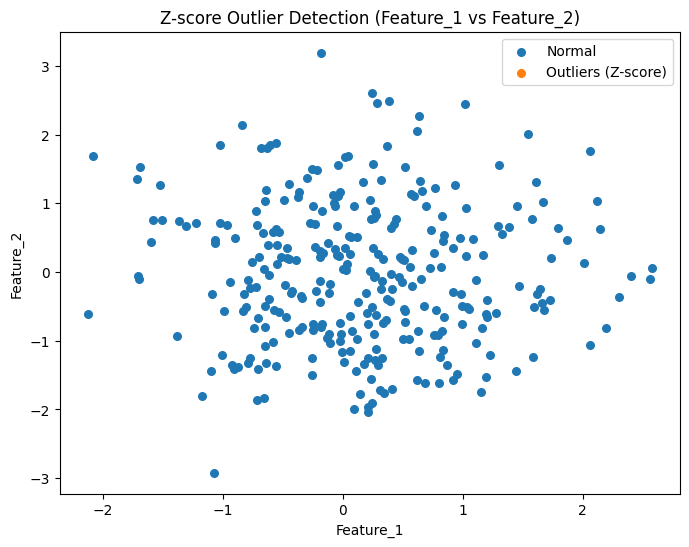

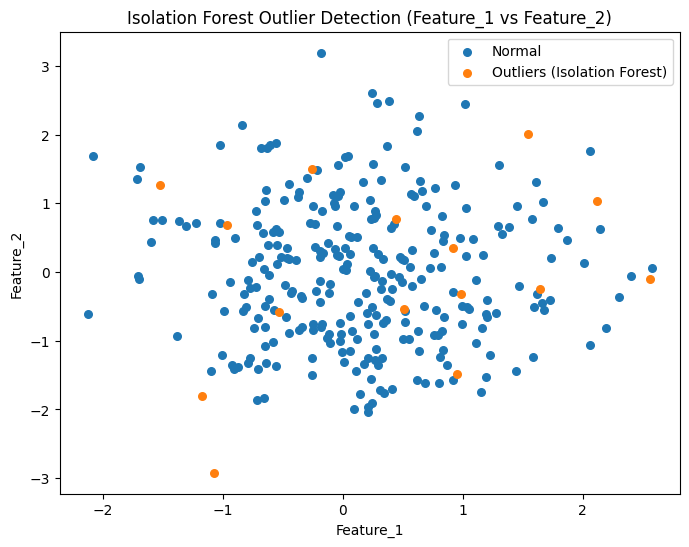

In [313]:
# ---------------------------------------------
# OUTLIER DETECTION: Z-SCORE + ISOLATION FOREST
# ---------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1) Generate random dataset (pure random)
np.random.seed(42)
n_samples = 300
n_features = 6
data = np.random.randn(n_samples, n_features)    # normal distribution

df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(n_features)])


# ------------------------------------------------
# Z-SCORE outlier detection (threshold = 3)
# ------------------------------------------------
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
z_outliers_mask = (z_scores > 5).any(axis=1)

# Scatter Plot (Feature_1 vs Feature_2)
plt.figure(figsize=(8,6))
plt.scatter(df.loc[~z_outliers_mask, 'Feature_1'], 
            df.loc[~z_outliers_mask, 'Feature_2'],
            label='Normal', s=30)

plt.scatter(df.loc[z_outliers_mask, 'Feature_1'], 
            df.loc[z_outliers_mask, 'Feature_2'],
            label='Outliers (Z-score)', s=30)

plt.title('Z-score Outlier Detection (Feature_1 vs Feature_2)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.show()


# ------------------------------------------------
# ISOLATION FOREST outlier detection
# ------------------------------------------------
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(df)
labels = iso.predict(df)
iso_outliers_mask = (labels == -1)

# Scatter Plot (Feature_1 vs Feature_2)
plt.figure(figsize=(8,6))
plt.scatter(df.loc[~iso_outliers_mask, 'Feature_1'], 
            df.loc[~iso_outliers_mask, 'Feature_2'],
            label='Normal', s=30)

plt.scatter(df.loc[iso_outliers_mask, 'Feature_1'], 
            df.loc[iso_outliers_mask, 'Feature_2'],
            label='Outliers (Isolation Forest)', s=30)

plt.title('Isolation Forest Outlier Detection (Feature_1 vs Feature_2)')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.show()


In [314]:
df.head(10)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137
1,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730
2,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247
3,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
4,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
5,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844
6,0.208864,-1.959670,-1.328186,0.196861,0.738467,0.171368
7,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122
8,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676
9,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545


### filter

In [320]:
numbers = [1, 2, 3, 4, 5, 6]
evens = list(filter(lambda x: x % 2 == 0, numbers))
print(evens)  # [2, 4, 6]


[2, 4, 6]


### reduce

In [321]:
from functools import reduce

nums = [1, 2, 3, 4]
product = reduce(lambda a, b: a * b, nums)
print(product)  # 24


24


### Decorators

In [322]:

def log_transaction(func):
    def wrapper(*args, **kwargs):
        print(f"🔔 Transaction started: {func.__name__}")
        result = func(*args, **kwargs)
        print(f"✅ Transaction completed: {func.__name__}\n")
        return result
    return wrapper


@log_transaction
def pay_with_card(amount):
    print(f"💳 Paid Rs.{amount} using Credit/Debit Card")

@log_transaction
def pay_with_upi(amount):
    print(f"📱 Paid Rs.{amount} using UPI")

@log_transaction
def pay_with_cash(amount):
    print(f"💵 Paid Rs.{amount} in Cash")


pay_with_card(500)
pay_with_upi(300)
pay_with_cash(1000)


🔔 Transaction started: pay_with_card
💳 Paid Rs.500 using Credit/Debit Card
✅ Transaction completed: pay_with_card

🔔 Transaction started: pay_with_upi
📱 Paid Rs.300 using UPI
✅ Transaction completed: pay_with_upi

🔔 Transaction started: pay_with_cash
💵 Paid Rs.1000 in Cash
✅ Transaction completed: pay_with_cash

